# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [2]:
dataset = pd.read_csv('pitches_c.csv')

In [3]:
#Remove darw with Nan row
dataset.dropna(inplace=True)
#dataset.drop(["EP", "FO", "PO", "SC", "UN", "IN"],inplace = True)

In [4]:
# Import ependent Variable
X = dataset.iloc[0:100000, 0:9].values

In [5]:
# Import Dependent Variable
y = dataset.iloc[0:100000, 29].values

# Split data and feature scaling

In [6]:
#Split data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fit Kernel SVM

In [8]:
#execution time estimation
import time
start = time.time() 

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

#execution time estimation
end = time.time()
print(end - start)

162.9863224029541


In [12]:
#Saving model
from sklearn.externals import joblib
filename = 'svm_model.sav'
joblib.dump(classifier, filename)

['svm_model.sav']

# Perdict test set and evaluate the model

In [13]:
# load the model from disk
loaded_model = joblib.load(filename)

# Predicting the Test set results
y_pred = loaded_model.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

np.savetxt("cm.csv", cm, delimiter=",") #save CM into csv file

In [14]:
#Visualize CM
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.set_size_inches(19.5, 10.5) #set figure size
    return ax

Confusion matrix, without normalization
[[2153   17    0    0   30   96    0    0   65    2    0    6    0  120
   166]
 [  23 1266    0    0    1    0    0    0    0    0   13    6    0    0
   338]
 [   2   11    0    0    0    0    0    0    0    1    0    0    0    0
     0]
 [   0    0    0    0    1    0    0    0    1    0    0    0    0    0
     0]
 [  27    0    0    0  590  391    0    0    9    2    0    0    0    2
   597]
 [  66    0    0    0  139 7931    0    0  410    1    0    0    0   63
    50]
 [   7    0    0    0    0    0    0    0    1    0    0    0    0    0
     1]
 [ 323    3    0    0    0    7    0    0    6    0    0    1    0   17
    77]
 [ 142    3    0    0   16  743    0    0 1731    0    0    0    0  331
    12]
 [   3    0    1    0    0    1    0    0    0  119    0    0    0    0
     0]
 [   7  349    0    0    0    0    0    0    0    0   44    1    0    0
   145]
 [  20   34    0    0    0    0    0    0    0    0    0   57    0    0
    19]


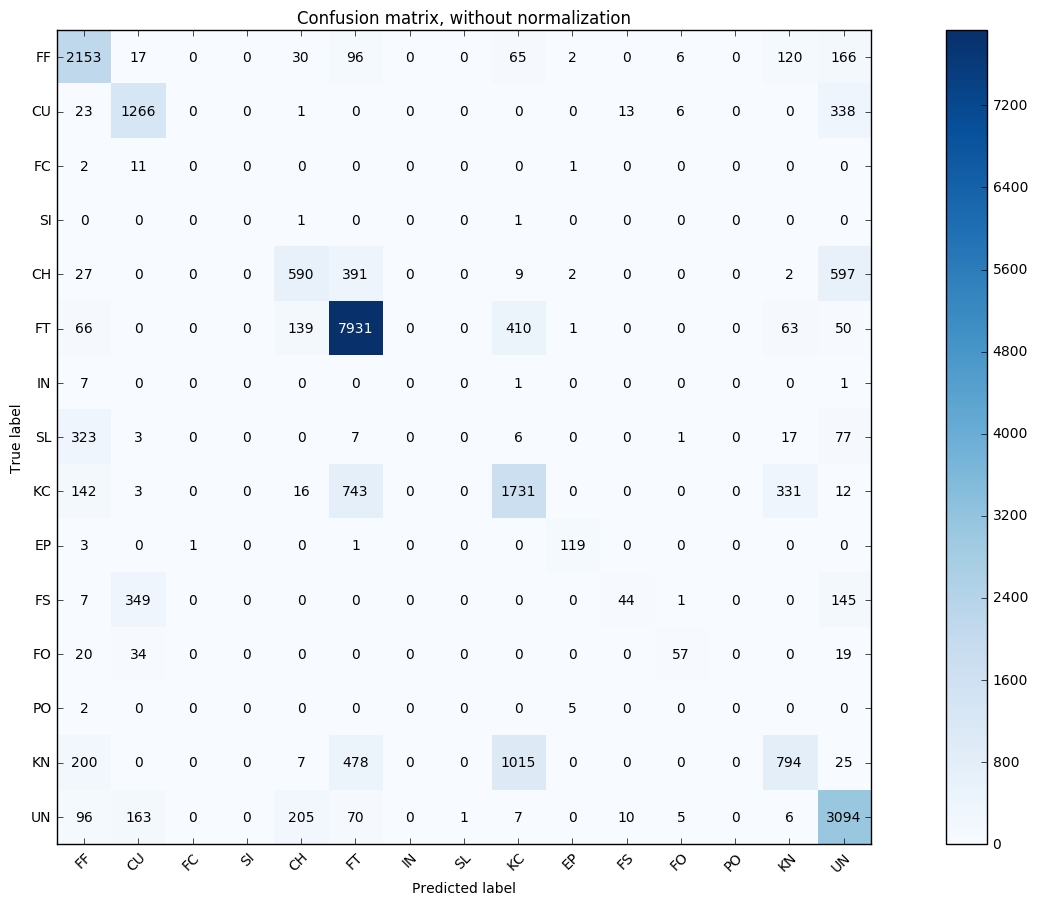

In [11]:
# Plot non-normalized confusion matrix
class_names = dataset['pitch_type'].unique()
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

In [17]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()
accuracies.std()

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default valu

0.004419120338455435

In [15]:
#evaluate test result accuracy and so on
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print ("accuracy :",accuracy)

accuracy : 0.71116
